In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from numba import cuda
from sklearn.model_selection import StratifiedKFold
import cv2
from sklearn.preprocessing import OneHotEncoder
import joblib

In [22]:
X_ = joblib.load("converted_img.pkl")
y_ = joblib.load("label.pkl")

In [42]:
X = joblib.load("CV2_float32.pkl")
y = joblib.load("label.pkl")

In [43]:
encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1, 1)
encoder.fit(y)
y = encoder.transform(y)

In [33]:
y_ = encoder.transform(y_.reshape(-1, 1))

In [25]:
X = np.append(X, X_)

In [26]:
X = X.reshape(-1, 32, 32, 3)

In [27]:
y = np.append(y, y, axis=0)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, stratify=y_, shuffle=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [29]:
es = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, mode="max")

In [30]:
Input = keras.layers.Input(shape=X[0].shape)

x = keras.layers.Conv2D(16, kernel_size=7, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
shortcut = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.MaxPool2D(2)(x)


x = keras.layers.Dropout(0.2)(x)


shortcut =x
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
shortcut = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)


x = keras.layers.Flatten()(x)
Output = keras.layers.Dense(128, activation="softmax")(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0005), metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100)
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
342/342 [==============================] - 8s 12ms/step - loss: 1.4945 - accuracy: 0.5622 - val_loss: 4.2766 - val_accuracy: 0.1986
Epoch 2/100
342/342 [==============================] - 4s 11ms/step - loss: 0.7701 - accuracy: 0.6996 - val_loss: 0.6556 - val_accuracy: 0.7332
Epoch 3/100
342/342 [==============================] - 4s 11ms/step - loss: 0.5650 - accuracy: 0.7741 - val_loss: 0.9663 - val_accuracy: 0.6791
Epoch 4/100
342/342 [==============================] - 4s 11ms/step - loss: 0.4582 - accuracy: 0.8210 - val_loss: 0.7011 - val_accuracy: 0.7162
Epoch 5/100
342/342 [==============================] - 4s 11ms/step - loss: 0.3904 - accuracy: 0.8502 - val_loss: 1.2469 - val_accuracy: 0.6580
Epoch 6/100
342/342 [==============================] - 4s 11ms/step - loss: 0.3362 - accuracy: 0.8697 - val_loss: 1.2553 - val_accuracy: 0.6382
Epoch 7/100
342/342 [==============================] - 4s 11ms/step - loss: 0.2821 - accuracy: 0.8920 - val_loss: 0.3385 - val_accuracy:

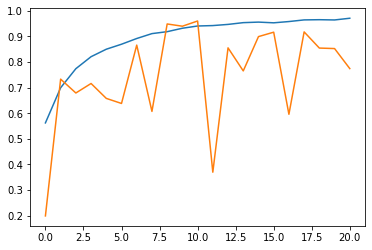

In [31]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [53]:
Input = keras.layers.Input(shape=X[0].shape)

x = keras.layers.Conv2D(16, kernel_size=7, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)


x = keras.layers.Dropout(0.2)(x)


shortcut =x
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Flatten()(x)
Output = keras.layers.Dense(128, activation="softmax")(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100)
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
342/342 [==============================] - 9s 22ms/step - loss: 1.2567 - accuracy: 0.5094 - val_loss: 6.0108 - val_accuracy: 0.1843
Epoch 2/100
342/342 [==============================] - 7s 20ms/step - loss: 0.8914 - accuracy: 0.6069 - val_loss: 1.6057 - val_accuracy: 0.38520.8933 - ac
Epoch 3/100
342/342 [==============================] - 7s 20ms/step - loss: 0.8027 - accuracy: 0.6413 - val_loss: 1.1913 - val_accuracy: 0.5055
Epoch 4/100
342/342 [==============================] - 7s 20ms/step - loss: 0.7376 - accuracy: 0.6669 - val_loss: 1.0158 - val_accuracy: 0.5698
Epoch 5/100
342/342 [==============================] - 7s 20ms/step - loss: 0.6785 - accuracy: 0.7019 - val_loss: 0.9936 - val_accuracy: 0.5841
Epoch 6/100
342/342 [==============================] - 7s 20ms/step - loss: 0.6330 - accuracy: 0.7190 - val_loss: 1.1246 - val_accuracy: 0.5363
Epoch 7/100
342/342 [==============================] - 7s 20ms/step - loss: 0.6001 - accuracy: 0.7433 - val_loss: 0.9858 - va

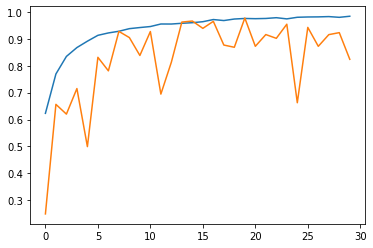

In [51]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, shuffle=True)

In [47]:
Input = keras.layers.Input(shape=X[0].shape)
x = keras.layers.Conv2D(16, kernel_size=7, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Flatten()(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100)
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
171/171 [==============================] - 2s 8ms/step - loss: 1.3746 - accuracy: 0.4495 - val_loss: 1.4827 - val_accuracy: 0.2714
Epoch 2/100
171/171 [==============================] - 1s 6ms/step - loss: 0.9303 - accuracy: 0.5949 - val_loss: 1.4243 - val_accuracy: 0.3885
Epoch 3/100
171/171 [==============================] - 1s 6ms/step - loss: 0.7699 - accuracy: 0.6661 - val_loss: 0.8896 - val_accuracy: 0.6082
Epoch 4/100
171/171 [==============================] - 1s 6ms/step - loss: 0.6585 - accuracy: 0.7167 - val_loss: 0.6796 - val_accuracy: 0.7137
Epoch 5/100
171/171 [==============================] - 1s 6ms/step - loss: 0.5784 - accuracy: 0.7612 - val_loss: 0.6007 - val_accuracy: 0.7538
Epoch 6/100
171/171 [==============================] - 1s 6ms/step - loss: 0.5212 - accuracy: 0.7978 - val_loss: 0.5697 - val_accuracy: 0.7698
Epoch 7/100
171/171 [==============================] - 1s 6ms/step - loss: 0.4662 - accuracy: 0.8240 - val_loss: 0.5256 - val_accuracy: 0.7890

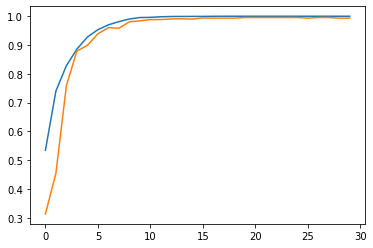

In [38]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

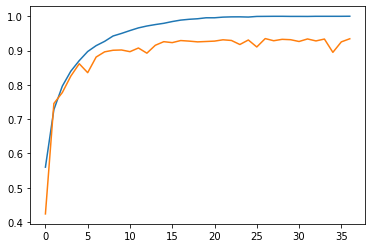

In [41]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

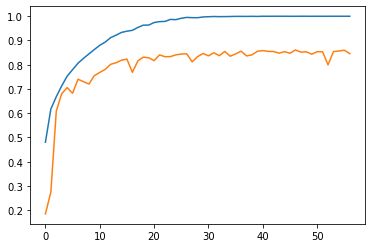

In [46]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

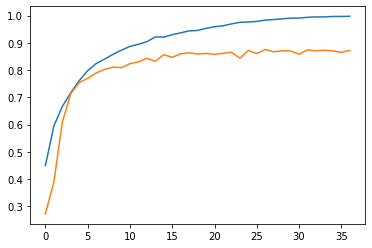

In [48]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

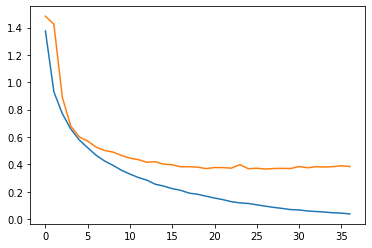

In [49]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])